In [12]:
from dataloader import DataLoader
import seaborn as sns

sns.set_theme(style="darkgrid")

In [13]:
loader = DataLoader(hs_code=282520)

_initialize_data took 28.8313 seconds


In [14]:
polar_df = loader.get_data()
df = polar_df.to_pandas()

In [15]:
years = sorted(df['t'].unique())
yearly_graphs = loader.get_yearly_graphs(years)

In [18]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Function to plot degree distributions of multiple graphs
def plot_degree_distributions(graph_list, labels):
    fig, ax = plt.subplots(figsize=(14, 8))
    markers = ['o', 's', '^', 'D', 'v', 'P', '*', 'X', 'h', '+']
    colors = plt.cm.tab10.colors

    for i, g in enumerate(graph_list):
        degrees = np.array([degree for _, degree in g.degree()])
        degrees = degrees[degrees > 0]  # Filter out nodes with degree 0

        unique, counts = np.unique(degrees, return_counts=True)
        probs = counts / np.sum(counts)

        sorted_indices = np.argsort(unique)
        unique = unique[sorted_indices]
        probs = probs[sorted_indices]

        ax.plot(unique, probs, linestyle='-', marker=markers[i % len(markers)],
                markersize=6, markeredgewidth=0.5, markeredgecolor='black',
                color=colors[i % len(colors)], label=labels[i])

    ax.loglog()
    ax.set_xlabel('$k$ (Degree)', fontsize=12)
    ax.set_ylabel('$P(k)$ (Probability)', fontsize=12)
    ax.set_title('Degree Distributions Comparison', fontweight='bold', fontsize=14)
    ax.legend()
    ax.grid(True, which="both", ls="--", linewidth=0.5)
    plt.tight_layout()
    plt.show()

# Function to plot a single graph with multiple fits
def plot_single_graph_with_fits(G, name):
    fig, ax = plt.subplots(figsize=(10, 6))

    degree_sequence = np.array([d for _, d in G.degree()])
    k_values, counts = np.unique(degree_sequence, return_counts=True)
    probs = counts / counts.sum()

    nonzero = probs > 0
    k_values = k_values[nonzero]
    probs = probs[nonzero]

    ax.loglog(k_values, probs, 'o', label="Empirical Data", color='blue', markersize=3)

    ##################
    # Power-law fit
    ##################
    gamma = 1 + len(degree_sequence) / np.sum(np.log(degree_sequence / degree_sequence.min()))
    x_powerlaw = k_values
    y_powerlaw = x_powerlaw ** (-gamma)
    y_powerlaw /= y_powerlaw.sum()  # Normalization
    ax.loglog(x_powerlaw, y_powerlaw, label=f"Power-law Fit (γ={gamma:.2f})", color='red', linewidth=2)

    ##################
    # Poisson fit
    ##################
    lambda_poisson = np.mean(degree_sequence)
    y_poisson = stats.poisson.pmf(k_values, lambda_poisson)
    y_poisson /= y_poisson.sum()  # Normalization
    ax.loglog(k_values, y_poisson, label="Poisson Fit", color='green', linestyle='--', linewidth=2)

    ##################
    # Exponential fit
    ##################
    y_exponential = (1 / lambda_poisson) * np.exp(-k_values / lambda_poisson)
    y_exponential /= y_exponential.sum()  # Normalization
    ax.loglog(k_values, y_exponential, label="Exponential Fit", color='orange', linestyle='-.', linewidth=2)

    ax.set_xlim([0.8 * k_values.min(), k_values.max() * 1.2])
    ax.set_ylim([0.5 * probs.min(), probs.max() * 2])

    ax.set_xlabel("Degree (k)")
    ax.set_ylabel("Probability p(k)")
    ax.set_title(f"Degree Distribution for {name}", fontweight='bold')
    ax.legend(fontsize=9)
    ax.grid(True, which="both", linestyle="--", linewidth=0.5)

    plt.tight_layout()
    plt.show()


C:\Users\sandr\AppData\Local\Temp\ipykernel_17100\769143015.py:33: UserWarning: Glyph 9001 (\N{LEFT-POINTING ANGLE BRACKET}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\sandr\AppData\Local\Temp\ipykernel_17100\769143015.py:33: UserWarning: Glyph 9002 (\N{RIGHT-POINTING ANGLE BRACKET}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\sandr\UntrackedFolder\NetworkScienceProject\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9001 (\N{LEFT-POINTING ANGLE BRACKET}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sandr\UntrackedFolder\NetworkScienceProject\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9002 (\N{RIGHT-POINTING ANGLE BRACKET}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


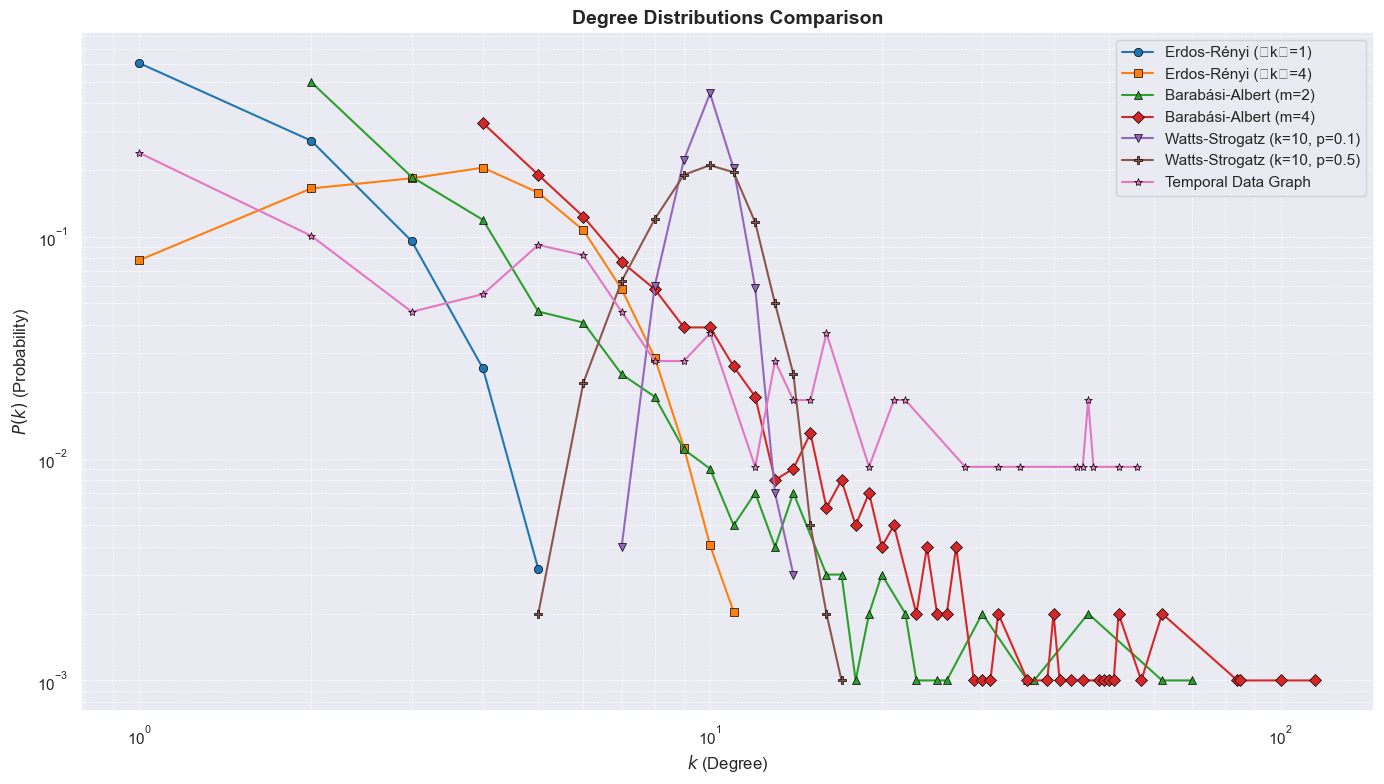

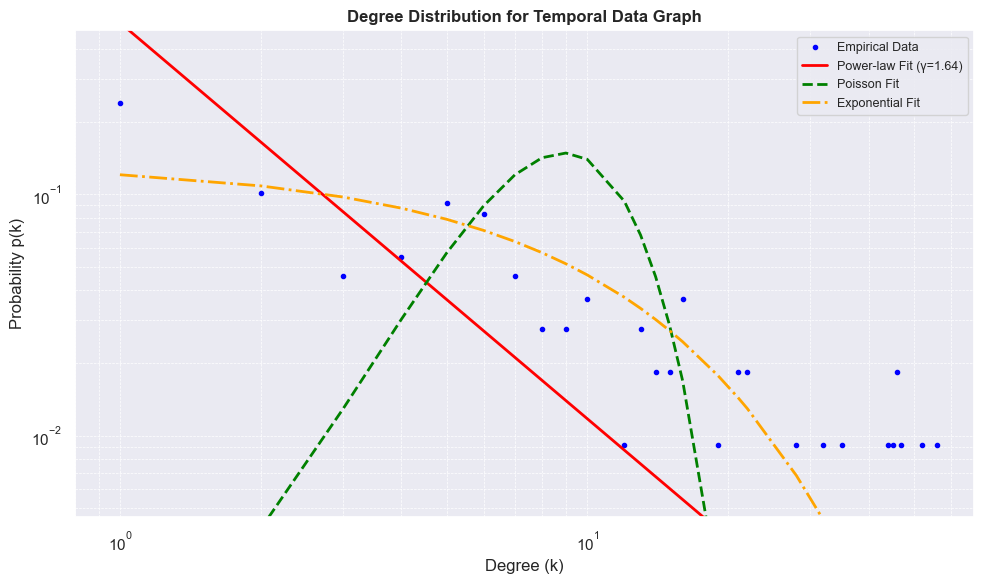

In [19]:

# Generate temporal graph data (replace this with actual temporal data if available)
n = 1000
data_graph = yearly_graphs[2020]  # Simulating data graph as Barabási-Albert for demonstration

# Theoretical Models
# Erdos-Rényi Graphs
k_values = [1, 4]
er_graphs = [nx.erdos_renyi_graph(n, k / (n - 1)) for k in k_values]

# Barabási-Albert Graphs
m_values = [2, 4]
ba_graphs = [nx.barabasi_albert_graph(n, m) for m in m_values]

# Watts-Strogatz Graphs
ws_graphs = [nx.watts_strogatz_graph(n, k, p) for k, p in [(10, 0.1), (10, 0.5)]]

# Combine Graphs and Labels
graph_list = er_graphs + ba_graphs + ws_graphs + [data_graph]
labels = (
    [f"Erdos-Rényi (〈k〉={k})" for k in k_values] +
    [f"Barabási-Albert (m={m})" for m in m_values] +
    ["Watts-Strogatz (k=10, p=0.1)", "Watts-Strogatz (k=10, p=0.5)"] +
    ["Temporal Data Graph"]
)

# Plot the degree distributions
plot_degree_distributions(graph_list, labels)

# Plot a single graph with fits
plot_single_graph_with_fits(data_graph, "Temporal Data Graph")
